In [6]:
import numpy as np # matematica
import pandas as ps # ciencias de dados
import matplotlib.pyplot as plt # grafica
import pandas_datareader.data as web # p importar dados do yahoo
import seaborn as sns #Melhorar visualização grafica 
import random

!pip install investpy
import investpy as inv


!pip install yfinance --upgrade --no-cache-dir # para puxar dados do yahoo
import yfinance as yf
yf.pdr_override()

sns.set()

!pip install git+https://github.com/quantopian/pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')


Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)
  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-64v1lssr
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-64v1lssr
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-cp36-none-any.whl size=75764 sha256=ff023e89310c4ba18e282b3e1690d839fc1023894319b5c577238f6c05252fc7
  Stored in directory: /tmp/pip-ephem-wheel-cache-0fkqr9hz/wheels/62/7d/a7/3e462442ba7d63c35414176627c886340521dc3dbc0893ce9f
Successfully built pyfolio


#Fazendo O ranking

In [9]:
#LEMBRE, o caminho do arquivo pode mudar de acordo com aonde vc esta executando
roic = ps.read_excel("/content/drive/My Drive/Colab Notebooks/Base de dados ACOES.xlsx", decimal=',',thousands='.')
evebit = ps.read_excel("/content/drive/My Drive/Colab Notebooks/Base de dados ACOES.xlsx", decimal=',',thousands='.',sheet_name="EvEbit")
#roic
#evebit

In [10]:
anos= [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
rankingROIC = ps.DataFrame()
rankingEVEBIT = ps.DataFrame()
rankingEVEBIT['posicao'] = range(1,144)
rankingROIC['posicao'] = range(1,144)
for data in anos:
    #rankingEVEBIT[data] = evebit[evebit[data] > 0].sort_values(by=[data])['Papel'].values #VALOR DA FIRMA(VALOR DE MERCADO+DIVIDA LIQUIDA)/LUCRO ANTES DE....
    #[evebit.loc[0:143, data]>0]
    rankingEVEBIT[data] = evebit.sort_values(by=[data])['Papel'].values #VALOR DA FIRMA(VALOR DE MERCADO+DIVIDA LIQUIDA)/LUCRO ANTES DE....
    rankingROIC[data] = roic.sort_values(by=[data], ascending=False)['Papel'].values 
rankingROIC

,posicao,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,ABEV3,HGTX3,CIEL3,HGTX3,SMLS3,PRIO3,ODPV3,WIZS3,WIZS3,WIZS3
1,2,CIEL3,CIEL3,HGTX3,CIEL3,ODPV3,TRPL4,WIZS3,SMLS3,SMLS3,SMLS3
2,3,HGTX3,ABEV3,ODPV3,ODPV3,ABEV3,SMLS3,ARZZ3,ODPV3,ODPV3,ODPV3
3,4,ARZZ3,ARZZ3,ARZZ3,ABEV3,ARZZ3,ODPV3,VULC3,UNIP6,TGMA3,TGMA3
4,5,LAME3,TOTS3,ABEV3,ARZZ3,LAME3,ABEV3,ABEV3,ARZZ3,QUAL3,QUAL3
...,...,...,...,...,...,...,...,...,...,...,...
138,139,GFSA3,VULC3,AGRO3,LPSB3,ELET6,ROMI3,EVEN3,DIRR3,KEPL3,AMAR3
139,140,PRIO3,CLSC4,ELET3,ENEV3,ELET3,TUPY3,TASA4,BRFS3,CCPR3,CCPR3
140,141,VULC3,PRIO3,ENEV3,TASA4,USIM3,GFSA3,LPSB3,EVEN3,TESA3,KEPL3
141,142,SMLS3,GOLL4,PRIO3,PRIO3,USIM5,TASA4,GFSA3,LPSB3,MTRE3,BRKM5


In [4]:
rankingEVEBIT

,posicao,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,ITSA4,ITSA4,GFSA3,CLSC4,SMLS3,TRPL4,BRKM5,SMLS3,SMLS3,SMLS3
1,2,CSNA3,BRML3,CIEL3,CIEL3,BRKM5,SMLS3,SMLS3,ENAT3,SULA11,MTRE3
2,3,LPSB3,CIEL3,LPSB3,CMIG3,CIEL3,UNIP6,CIEL3,UNIP6,WIZS3,WIZS3
3,4,VLID3,HGTX3,CMIG3,CMIG4,BRFS3,CIEL3,ENAT3,BRKM5,ALUP11,GOLL4
4,5,CIEL3,VLID3,CMIG4,BRFS3,ENBR3,ELET3,FESA4,FESA4,GOLL4,ALUP11
...,...,...,...,...,...,...,...,...,...,...,...
138,139,CCPR3,ENEV3,ENEV3,ENEV3,BRDT3,USIM3,KLBN3,GFSA3,MTRE3,CCPR3
139,140,ENEV3,BRDT3,BRDT3,BRDT3,ELET3,CCPR3,TESA3,KLBN3,KLBN3,TESA3
140,141,BRDT3,ELET3,ELET3,ELET3,ELET6,BRDT3,LOGN3,TESA3,KEPL3,AMAR3
141,142,MOVI3,KLBN3,NEOE3,MOVI3,KLBN3,TESA3,TASA4,CCPR3,CAMB3,KLBN3


In [11]:
ranking = ps.DataFrame()
for data in anos:
    a = rankingEVEBIT.pivot_table(columns=data,values='posicao')
    b = rankingROIC.pivot_table(columns=data,values='posicao')
    c = ps.concat([a,b])
    rank_temporario = c.sum()
    t=c.sum()
    rank_temporario = rank_temporario.sort_values()
    ranking[data] = rank_temporario.index+'.SA'
    

In [ ]:
#ranking.to_excel('ClassificacaoDpsPython.xlsx')
a
#ranking

2020,ITSA4,AALR3,ABEV3,AGRO3,ALPA4,ALSO3,ALUP11,AMAR3,ANIM3,ARZZ3,B3SA3,BEEF3,BRDT3,BRFS3,BRKM5,BRML3,CAMB3,CAML3,CARD3,CCPR3,CCRO3,CESP6,CIEL3,CLSC4,CMIG3,CMIG4,COCE5,CPFE3,CPLE3,CPLE6,CRFB3,CSAN3,CSMG3,CSNA3,CVCB3,CYRE3,DIRR3,DTEX3,ECOR3,EGIE3,...,RADL3,RAIL3,RAPT4,RENT3,RLOG3,ROMI3,SAPR11,SAPR4,SBSP3,SEER3,SHUL4,SLCE3,SMLS3,SMTO3,SULA11,SUZB3,TASA4,TESA3,TGMA3,TIET11,TIET4,TIMP3,TOTS3,TRIS3,TRPL4,TUPY3,UGPA3,UNIP6,USIM3,USIM5,VALE3,VIVT3,VIVT4,VLID3,VULC3,VVAR3,WEGE3,WIZS3,WSON33,YDUQ3
posicao,30,95,74,56,134,96,5,141,125,105,121,12,111,34,137,8,136,72,51,139,53,57,58,10,62,61,41,44,19,18,82,43,25,99,33,104,77,94,87,46,...,122,114,36,115,45,108,13,14,32,28,67,35,1,38,6,120,52,140,20,55,54,21,130,76,11,47,112,27,65,64,103,60,59,66,49,138,133,3,93,70


In [ ]:
b

2020,ITSA4,AALR3,ABEV3,AGRO3,ALPA4,ALSO3,ALUP11,AMAR3,ANIM3,ARZZ3,B3SA3,BEEF3,BRDT3,BRFS3,BRKM5,BRML3,CAMB3,CAML3,CARD3,CCPR3,CCRO3,CESP6,CIEL3,CLSC4,CMIG3,CMIG4,COCE5,CPFE3,CPLE3,CPLE6,CRFB3,CSAN3,CSMG3,CSNA3,CVCB3,CYRE3,DIRR3,DTEX3,ECOR3,EGIE3,...,RADL3,RAIL3,RAPT4,RENT3,RLOG3,ROMI3,SAPR11,SAPR4,SBSP3,SEER3,SHUL4,SLCE3,SMLS3,SMTO3,SULA11,SUZB3,TASA4,TESA3,TGMA3,TIET11,TIET4,TIMP3,TOTS3,TRIS3,TRPL4,TUPY3,UGPA3,UNIP6,USIM3,USIM5,VALE3,VIVT3,VIVT4,VLID3,VULC3,VVAR3,WEGE3,WIZS3,WSON33,YDUQ3
posicao,11,108,9,75,82,129,23,139,130,6,32,8,100,46,142,49,138,66,30,140,42,86,71,91,114,113,83,35,69,70,77,33,47,99,79,87,118,81,72,10,...,44,97,43,50,103,123,19,20,34,58,63,61,2,40,92,124,38,137,4,24,25,28,17,36,41,74,112,54,128,127,111,93,94,98,60,143,18,1,101,13


In [ ]:
ranking

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,CIEL3.SA,HGTX3.SA,CIEL3.SA,CIEL3.SA,SMLS3.SA,TRPL4.SA,SMLS3.SA,SMLS3.SA,SMLS3.SA,SMLS3.SA
1,HGTX3.SA,CIEL3.SA,HGTX3.SA,HGTX3.SA,BRKM5.SA,SMLS3.SA,WIZS3.SA,UNIP6.SA,WIZS3.SA,WIZS3.SA
2,VALE3.SA,BRML3.SA,UNIP6.SA,AGRO3.SA,CIEL3.SA,UNIP6.SA,VULC3.SA,ENAT3.SA,GOLL4.SA,GOLL4.SA
3,VLID3.SA,VLID3.SA,CMIG3.SA,CMIG4.SA,UGPA3.SA,CIEL3.SA,BRKM5.SA,WIZS3.SA,ALUP11.SA,BEEF3.SA
4,CSAN3.SA,AMAR3.SA,CMIG4.SA,CMIG3.SA,ABEV3.SA,CCRO3.SA,CIEL3.SA,BRKM5.SA,TGMA3.SA,TGMA3.SA
...,...,...,...,...,...,...,...,...,...,...
138,MTRE3.SA,USIM3.SA,BRDT3.SA,LPSB3.SA,LPSB3.SA,GOAU4.SA,TESA3.SA,DIRR3.SA,KLBN3.SA,BRKM5.SA
139,CCPR3.SA,BRDT3.SA,AGRO3.SA,BRDT3.SA,USIM5.SA,USIM3.SA,LOGG3.SA,EVEN3.SA,KEPL3.SA,CCPR3.SA
140,VULC3.SA,CLSC4.SA,LOGG3.SA,ELET3.SA,USIM3.SA,LOGG3.SA,BRML3.SA,TESA3.SA,MTRE3.SA,AMAR3.SA
141,CLSC4.SA,ENEV3.SA,ENEV3.SA,TASA4.SA,ELET6.SA,LPSB3.SA,TASA4.SA,BRFS3.SA,VVAR3.SA,VVAR3.SA


#Rodando o BackTesting

In [ ]:
#retirado do site, la tem o cod -- https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
#codigo_bcb = 433
def consulta_bc(codigo_bcb): #crindo como uma função
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = ps.read_json(url)
  df['data'] = ps.to_datetime(df['data'], dayfirst=True)# transformata formato da coluna data
  df.set_index('data',inplace=True) #setando data como index
  return df

In [ ]:
data_i = '2012-01-01'
data_f = '2020-07-20'

cdi = consulta_bc(12)
cdi
cdi_acumulado = (1 + cdi[ cdi.index >= data_i]/100).cumprod()
cdi_acumulado.iloc[0]= 1

#cdi_acumulado.loc['2012-01-01': '2014-01-01']

In [ ]:
cdi_acumulado

,valor
data,
2012-01-02,1.000000
2012-01-03,1.000820
2012-01-04,1.001231
2012-01-05,1.001640
2012-01-06,1.002050
...,...
2020-07-22,2.116431
2020-07-23,2.116609
2020-07-24,2.116788


In [24]:
dados = ps.DataFrame()
#dados_total
carteira_total = ps.DataFrame()

anos        = [2011,2012,2013,2014,2015,2016,2017,2018,2019]#,2020]
data_inicio = ['2012-01-01','2013-01-01','2014-01-01','2015-01-01','2016-01-01','2017-01-01','2018-01-01','2019-01-01','2020-01-01']
data_fim    = ['2013-01-01','2014-01-01','2015-01-01','2016-01-01','2017-01-01','2018-01-01','2019-01-01','2020-01-01','2020-07-20']
#'2011-01-01'
#'2012-01-01'
valor_investido=1/3 #em cada

''' Usar para colocar o cdi na estrategia
cdi = consulta_bc(12)
cdi
cdi_acumulado = (1 + cdi[ cdi.index >= data_inicio[0]]/100).cumprod()
cdi_acumulado.iloc[0]= 1
#dados['outra_metade'] =  cdi_acumulado.loc[data_inicio[x]: data_fim[x]]
'''  

x=0#importante para o for
for data in anos:
  i=1
  dados = ps.DataFrame()
  for ativo in ranking[data][:3]:
                
    dados[i] = web.get_data_yahoo(ativo, start =data_inicio[x], end =data_fim[x])['Adj Close']
    i=i+1
  
  #dados['Dolar_1']= web.get_data_yahoo('USDBRL=X', start =data_inicio[x], end =data_fim[x])['Adj Close']  
  #dados['Dolar_2']= web.get_data_yahoo('USDBRL=X', start =data_inicio[x], end =data_fim[x])['Adj Close']  
  #dados['Dolar_3']= web.get_data_yahoo('USDBRL=X', start =data_inicio[x], end =data_fim[x])['Adj Close']  
  
  retorno = dados.pct_change() # retorno diario de todos
  retorno_acumulado = (1 + retorno).cumprod()#fazendo produtorio
  retorno_acumulado.iloc[0] = 1# so para ajustar primeira linha da tabela, tirar o NaN
  
  carteira = valor_investido * retorno_acumulado # seria o retorno acumulado se fosse investido R$10.000
  carteira["saldo"] = carteira.sum(axis=1)
  carteira["retorno"] = carteira["saldo"].pct_change()

  ram = len(carteira)-1
  valor_investido = carteira["saldo"].iloc[ram] /3 #pegando o saldo final do ano e colocando 1/5 em cada nova acao do ano
  
  carteira_total = ps.concat([carteira_total,carteira])
  x=x+1  #incrementando para a proxima data



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [25]:
carteira_total
#carteira_total.to_excel('Olhar.xlsx')
#web.get_data_yahoo('USDBRL=X', start =data_inicio[0], end =data_fim[8])#['Adj Close']

,1,2,3,saldo,retorno
Date,,,,,
2012-01-02,0.333333,0.333333,0.333333,1.000000,NaN
2012-01-03,0.334574,0.335846,0.348166,1.018587,0.018587
2012-01-04,0.335746,0.332463,0.350530,1.018740,0.000150
2012-01-05,0.330920,0.339809,0.341157,1.011886,-0.006727
2012-01-06,0.328852,0.345511,0.338223,1.012586,0.000692
...,...,...,...,...,...
2020-07-13,0.613948,1.137636,0.722784,2.474368,-0.005284
2020-07-14,0.602310,1.104116,0.735326,2.441752,-0.013182
2020-07-15,0.638473,1.101069,0.786569,2.526112,0.034549


In [17]:
car = ps.DataFrame()#
car['tudo'] = carteira_total['saldo']

In [23]:
dolar = ps.DataFrame()
dolar['dolar'] = carteira_total['saldo']

In [26]:
formula = ps.DataFrame()#
formula['formula'] = carteira_total['saldo']

In [ ]:
dolar

,dolar
Date,
2012-01-02,1.000000
2012-01-03,1.004188
2012-01-04,0.985072
2012-01-05,0.976427
2012-01-06,0.989636
...,...
2020-07-14,2.899643
2020-07-15,2.881015
2020-07-16,2.881096


In [14]:
#ibov = inv.get_index_historical_data('Bovespa',country='brazil',from_date=data_inicio[0],to_date=data_fim[9])#['Close']
ibov = web.get_data_yahoo('^BVSP',start =data_inicio[0], end =data_fim[8])['Adj Close']

ret = ps.DataFrame()
ret['ibov'] = ibov.pct_change() # retorno diario de todos
ret_acumulado = 1*(1 + ret).cumprod()#fazendo produtorio
ret_acumulado.iloc[0] = 1# so para ajustar primeira linha da tabela, tirar o NaN

carteira_total['ibov_acumulado']=ret_acumulado
carteira_total['ibov_retorno']=ret



[*********************100%***********************]  1 of 1 completed


In [ ]:
ret_acumulado

,ibov
Date,
2012-01-03,1.000000
2012-01-04,1.001687
2012-01-05,0.987868
2012-01-06,0.988779
2012-01-09,0.996929
...,...
2020-07-13,1.665351
2020-07-14,1.694761
2020-07-15,1.717557


In [ ]:
carteira_total = carteira_total.dropna()

In [ ]:
carteira_total.to_excel('Olhar.xlsx')

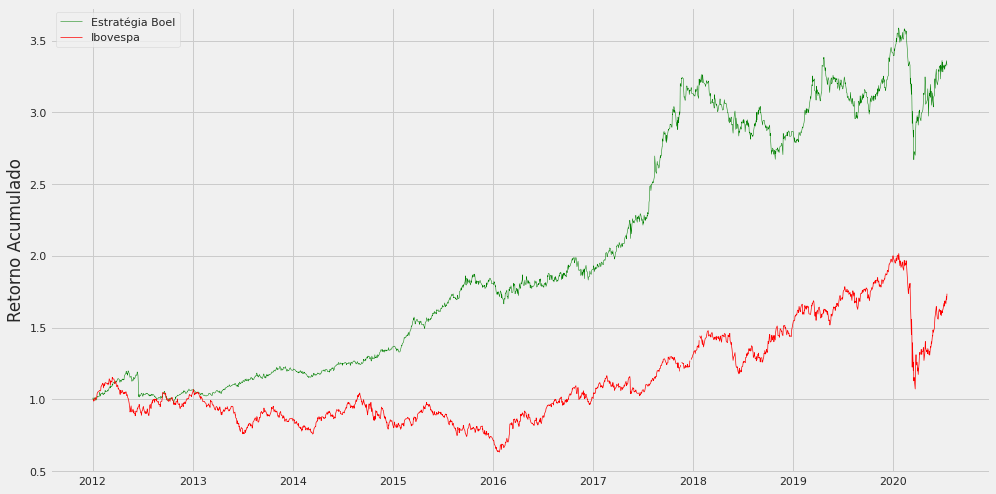

In [16]:

#plota tabela res
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))
plt.plot(carteira_total["saldo"], label = 'Estratégia Boel',alpha = 1, linewidth=0.5, color='green')
plt.plot(carteira_total['ibov_acumulado'], label = 'Ibovespa',alpha = 1, linewidth=0.7, color='red')
#plt.plot(res[acao], label = acao,alpha = 1, linewidth=0.7, color='black')
#adicionar um subplot
plt.ylabel('Retorno Acumulado')
#plt.title(acao, fontsize=20)
plt.legend(loc='best')

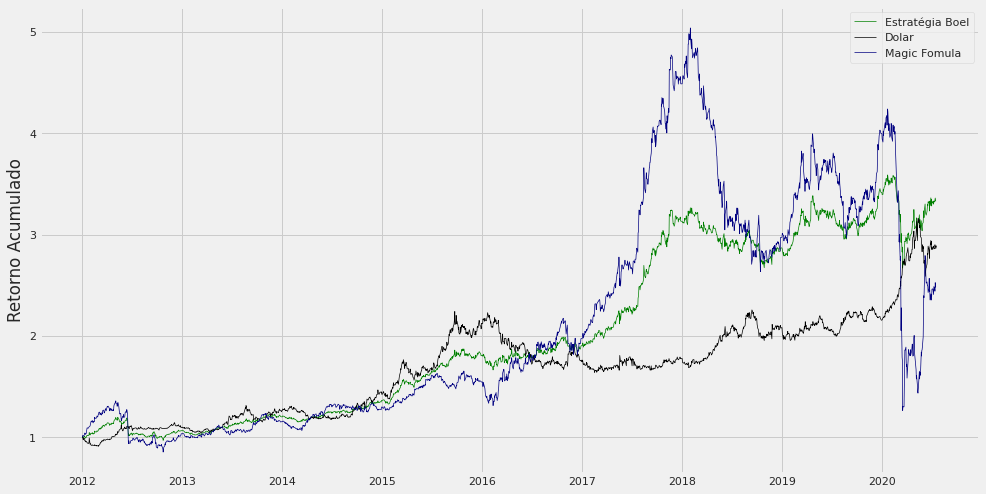

In [31]:

#plota tabela res
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))
plt.plot(car['tudo'], label = 'Estratégia Boel',alpha = 1, linewidth=0.7, color='green')
plt.plot(dolar['dolar'], label = 'Dolar',alpha = 1, linewidth=0.7, color='black')
plt.plot(formula['formula'], label = 'Magic Fomula',alpha = 1, linewidth=0.7, color='navy')

#plt.plot(res[acao], label = acao,alpha = 1, linewidth=0.7, color='black')
#adicionar um subplot
plt.ylabel('Retorno Acumulado')
#plt.title(acao, fontsize=20)
plt.legend(loc='best')

Start date,2012-01-02
End date,2020-07-17
Total months,100
,Backtest
Annual return,6.645%
Cumulative returns,71.631%
Annual volatility,25.978%
Sharpe ratio,0.38
Calmar ratio,0.14
Stability,0.58
Max drawdown,-46.816%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,46.82,2020-01-23,2020-03-23,NaT,NaN
1,45.18,2012-03-13,2016-01-26,2017-02-20,1290
2,20.35,2018-02-26,2018-06-18,2018-11-01,179
3,12.01,2017-02-21,2017-06-21,2017-08-22,131
4,10.00,2019-03-18,2019-05-17,2019-06-19,68


Stress Events,mean,min,max
EZB IR Event,0.02%,-2.28%,3.40%
Apr14,0.13%,-2.21%,2.85%
Oct14,0.08%,-3.45%,4.78%
Fall2015,-0.15%,-3.03%,3.64%
Recovery,0.02%,-3.31%,4.72%
New Normal,0.04%,-14.78%,13.91%


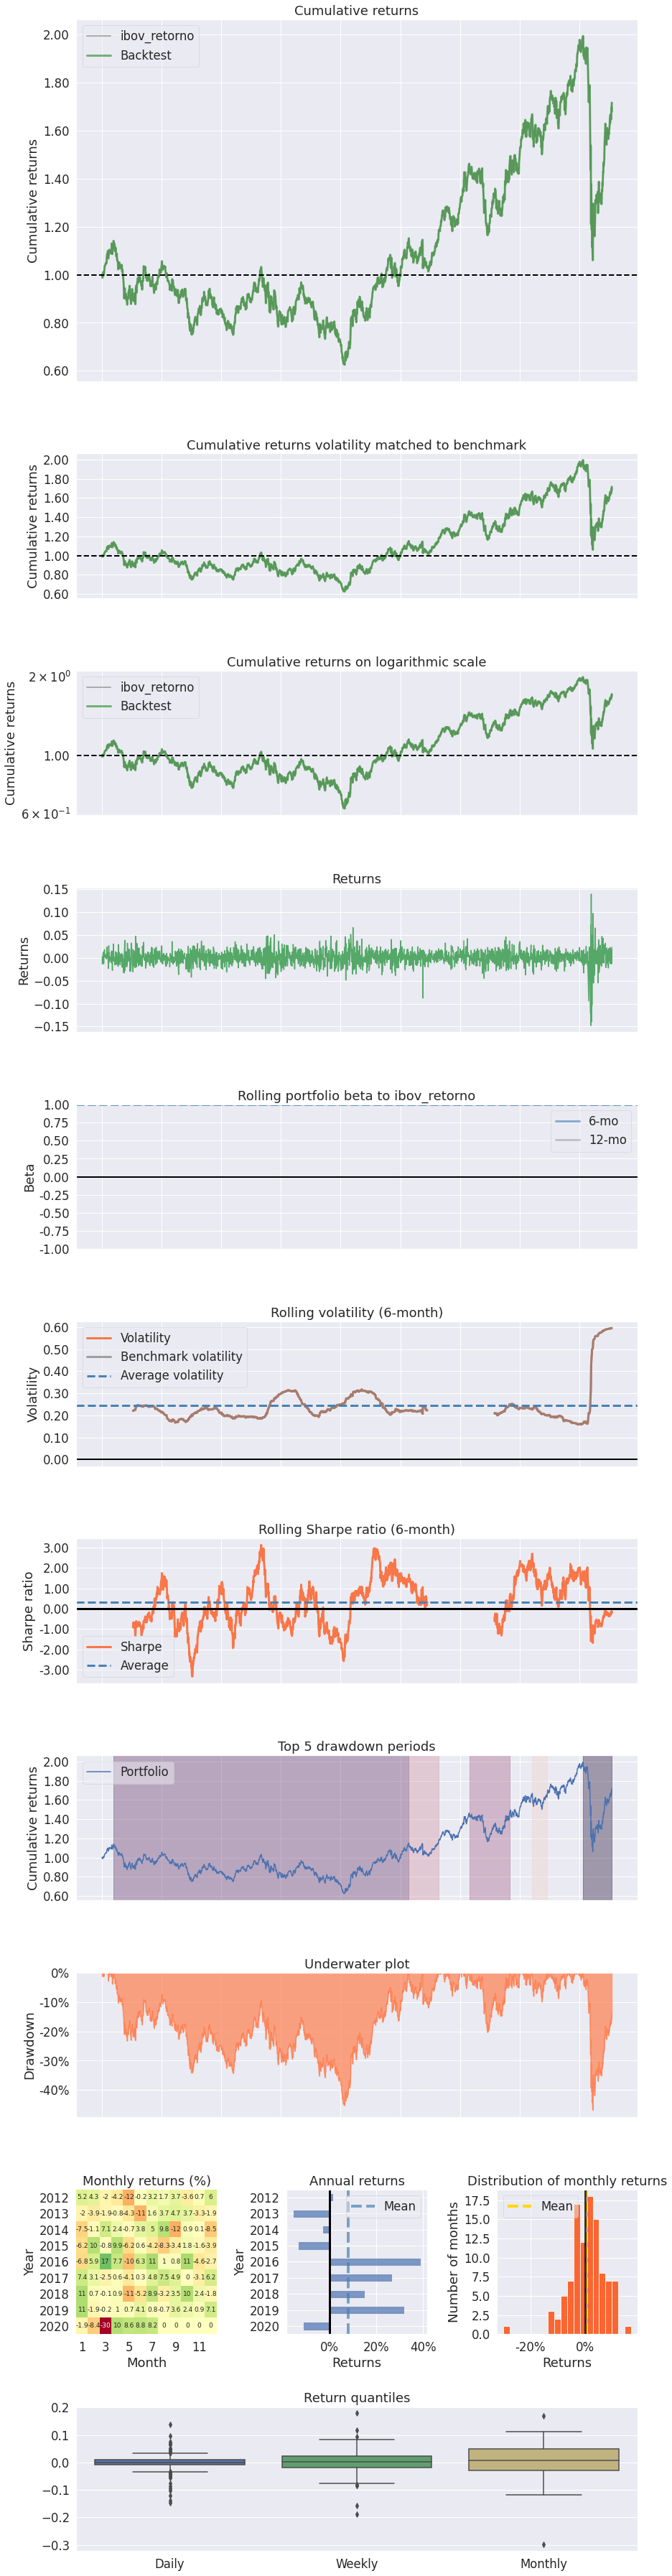

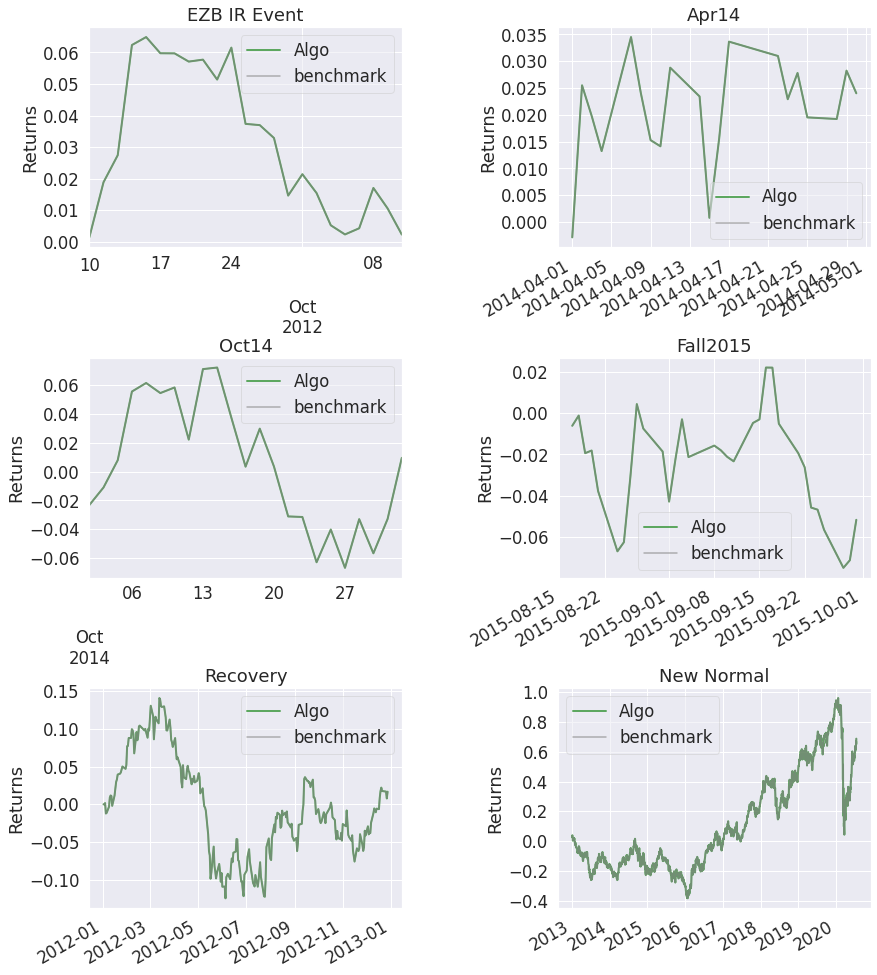

In [ ]:
#pf.create_full_tear_sheet(carteira_total["retorno"], benchmark_rets=carteira_total["ibov_retorno"])#ret['ibov'])
pf.create_full_tear_sheet(carteira_total["ibov_retorno"], benchmark_rets=carteira_total["ibov_retorno"])#ret['ibov'])